## Happy House Smile Detector using CNN

#### Problem Description

This is a smile detector and classfies images in to whether it has a smilling face or not.

<img src="./images/house-members.png" style="width:550px;height:250px;">


**Note:** In this notebook, we also visualize every channel in every intermediate activation

#### Network Architecture and Tools/Libraries used
- CNN
- Numpy
- keras

#### Dataset
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

Data Source: https://www.kaggle.com/iarunava/happy-house-dataset


### Import Libraries

In [3]:
# import all the libraries
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import layer_utils

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import h5py

Using TensorFlow backend.


### Import Data

In [4]:
# Print the list of files in the kaggle input directory
for dirname, _, filenames in os.walk('./data/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/kaggle/input/test_happy.h5
./data/kaggle/input/train_happy.h5


In [5]:
def load_dataset(printTrainKeys, printTrainClasses):
    train_dataset = h5py.File('./data/kaggle/input/train_happy.h5', 'r')
    train_x_orig = np.array(train_dataset["train_set_x"][:])  # training set features
    train_y_orig = np.array(train_dataset["train_set_y"][:])  # training set labels

    if printTrainKeys:
        for key in train_dataset.keys():
            print('train_dataset keys:', key)

    test_dataset = h5py.File('./data/kaggle/input/test_happy.h5', 'r')
    test_x_orig = np.array(test_dataset["test_set_x"][:])     # test set features
    test_y_orig = np.array(test_dataset["test_set_y"][:])     # test set labels
    #print(test_y_orig.shape)
    
    classes = train_dataset["list_classes"][:]      # list of classes
    
    if printTrainClasses:
        print('classes: ', classes)
    
    train_y_orig = train_y_orig.reshape((1, train_y_orig.shape[0]))
    test_y_orig = test_y_orig.reshape((1, test_y_orig.shape[0]))
    
    return train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes

### Normalize the dataset

In [14]:
train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes = load_dataset(False, False)

X_train = train_x_orig/255.
X_test = test_x_orig/255.

Y_train = train_y_orig.T
Y_test = test_y_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


### Visualizing the dataset

[1]


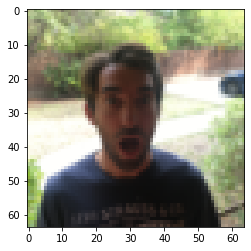

In [15]:
# Visualize an image from the training dataset
index = np.random.randint(0, X_train.shape[0])   # Select any random index between 1 and 599
plt.imshow(X_train[index])
plt.show
print(Y_train[index])

/home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


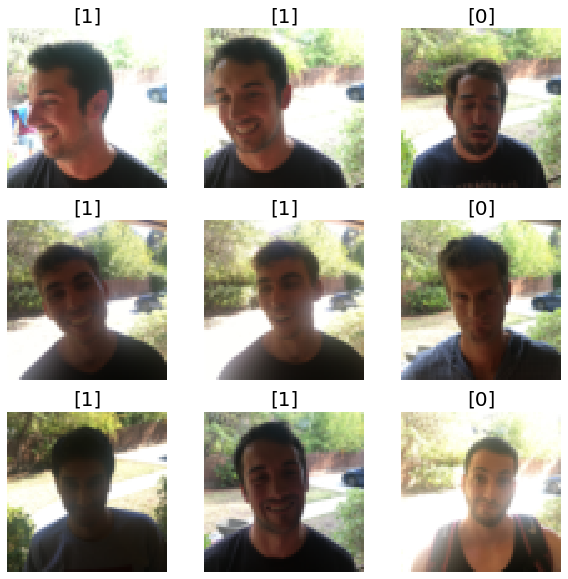

In [16]:
rows = 3
columns = 3
fig, axes = plt.subplots(rows, columns, figsize=(10,10))

axes = axes.ravel() # Flatten the 4 x 3 matrix into an array of size 12.

m = X_train.shape[0] # number of training examples

for i in np.arange(0, rows * columns): # returns evenly spaced values within a given interval.
    
    index = np.random.randint(0, m)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index], fontsize=20)
    axes[i].axis('off')
    

### Build a CNN Model

In [17]:
def buildModel(inputshape):
    model = Sequential()
    
    # Conv2D -> MAXPOOL
    model.add(Conv2D(64, (3, 3), input_shape=inputshape, activation='relu', name='conv0'))
    model.add(MaxPooling2D(pool_size=(2,2), name = 'max_pool0'))
    
    # Conv2D -> MAXPOOL
    model.add(Conv2D(128, (5, 5), activation='relu', name='conv1'))
    model.add(MaxPooling2D(pool_size=(2,2), name = 'max_pool1'))
    
    # FLATTEN
    model.add(Flatten())   # Flatten the image (convert it in to vector)
    
    # Fully connected Hidden layer
    model.add(Dense(512, activation='relu', name='fc0'))  #512 hidden units
    
    # Output Layer
    model.add(Dense(1, activation='sigmoid', name='fc1'))  # Output layer with 1 unit
    
    return model

In [18]:
model = buildModel((64, 64,3))

W0809 11:17:31.472481 139655969257280 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 11:17:31.484558 139655969257280 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 11:17:31.550474 139655969257280 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 11:17:31.564612 139655969257280 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.

### Train the Model

In [19]:
# compile the model 
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

W0809 11:17:32.609226 139655969257280 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0809 11:17:32.629609 139655969257280 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0809 11:17:32.634397 139655969257280 deprecation.py:323] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
# Train the model
history = model.fit(x = X_train, y = Y_train, 
                    validation_split=0.2, 
                    batch_size=64, 
                    epochs=7, verbose=2)

W0809 11:17:33.126566 139655969257280 deprecation_wrapper.py:119] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 480 samples, validate on 120 samples
Epoch 1/7
 - 3s - loss: 1.2377 - acc: 0.5292 - val_loss: 0.6879 - val_acc: 0.6750
Epoch 2/7
 - 2s - loss: 0.6717 - acc: 0.6000 - val_loss: 0.6438 - val_acc: 0.7000
Epoch 3/7
 - 2s - loss: 0.6072 - acc: 0.6729 - val_loss: 0.5660 - val_acc: 0.7500
Epoch 4/7
 - 2s - loss: 0.5065 - acc: 0.7438 - val_loss: 0.4409 - val_acc: 0.8000
Epoch 5/7
 - 2s - loss: 0.3977 - acc: 0.7979 - val_loss: 0.3322 - val_acc: 0.8833
Epoch 6/7
 - 2s - loss: 0.2958 - acc: 0.8604 - val_loss: 0.2204 - val_acc: 0.9250
Epoch 7/7
 - 2s - loss: 0.2447 - acc: 0.9229 - val_loss: 0.2304 - val_acc: 0.9000


In [21]:
# Evaluate the model on the test set
test_evaluation = model.evaluate(X_test, Y_test)
print ("Loss = " + str(test_evaluation[0]))
print ("Test Accuracy = " + str(test_evaluation[1]))

150/150 [==============================] - 0s 1ms/step
Loss = 0.3990389347076416
Test Accuracy = 0.793333334128062


### Predictions on Test data

- model.predict(): Generates output predictions for the input samples. Output will be like 9.99, 9.98 and 1.0.
- model.predict_classes(): Generate class predictions for the input samples. Output will be like 0, 1 etc

In [47]:
predicted_classes = model.predict_classes(X_test)
print('predicted classes shape:', predicted_classes.shape)
print ('Y_test shape:', Y_test.shape)

predicted classes shape: (150, 1)
Y_test shape: (150, 1)


array([1])

### Visualize predictions on test data

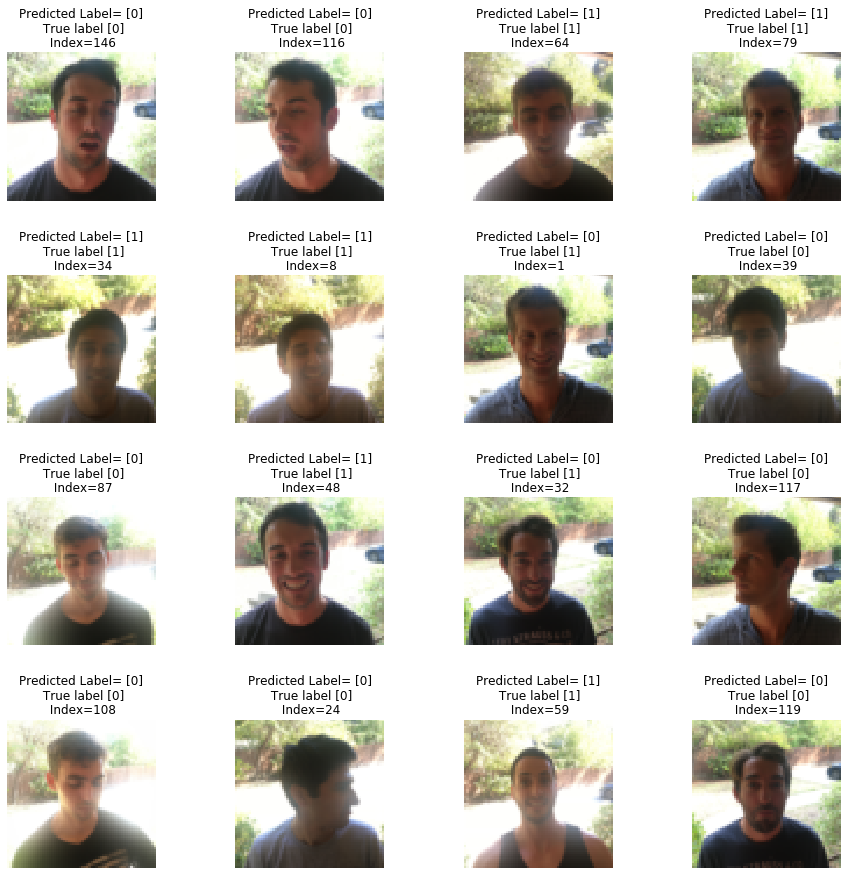

In [50]:
rows = 4
columns = 4
fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

m = X_test.shape[0]  # number of examples in a test dataset

for i in np.arange(0, rows * columns):
    index = np.random.randint(0, m-1)
    
    axes[i].imshow(X_test[index])
    axes[i].set_title('Predicted Label= {}\n True label {}\n Index={}'
                      .format(predicted_classes[index], Y_test[index], index))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)

### Classification Report

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.68      0.98      0.81        66
           1       0.98      0.64      0.78        84

    accuracy                           0.79       150
   macro avg       0.83      0.81      0.79       150
weighted avg       0.85      0.79      0.79       150



### Model summary

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 31, 31, 64)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 128)       204928    
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
fc0 (Dense)                  (None, 512)               11076096  
_________________________________________________________________
fc1 (Dense)                  (None, 1)                 513       
Total para

## Visualizing Convolution Filters
The first convolutional layer has 64 filters with a shape (3 x 3) and 3 color channels. So, each filter is composed of 9 parameters, this gives us 64 * 9 * 3 = 1728 weights. In addition there will be 64 parameters (bias for each filter) for bias terms.

- Total parameters/weights = 1728 + 64 = 1792
- model.add(Conv2D(64, (3, 3), input_shape=inputshape, activation='relu', name='conv0'))
- model.add(MaxPooling2D(pool_size=(2,2), name = 'max_pool0'))
- model.add(Conv2D(128, (5, 5), activation='relu', name='conv1'))

In [79]:
W1 = model.layers[0].get_weights()
A1 = model.layers[0].output
f1_raw = W1[0]
b1_raw = W1[1]
print('Output of 1st Conv layer:', A1)
print('Shape of filters from 1st Conv layer:', W1[0].shape)
print('Shape of biases from 1st conv layer:', W1[1].shape)

Output of 1st Conv layer: Tensor("conv0/Relu:0", shape=(?, 62, 62, 64), dtype=float32)
Shape of filters from 1st Conv layer: (3, 3, 3, 64)
Shape of biases from 1st conv layer: (64,)


In [87]:
layer_to_visualize = ['conv0', 'conv1']
layer_outputs = [layer.output for layer in model.layers if layer.name in layer_to_visualize]
print('Activation shape from 1st Conv layer: {}'.format(layer_outputs[0].shape))
print('Activation shape from 2nd Conv layer: {}'.format(layer_outputs[1].shape))

Activation shape from 1st Conv layer: (?, 62, 62, 64)
Activation shape from 2nd Conv layer: (?, 27, 27, 128)


- **np.expand_dim()** - Insert a new axis that will appear at the axis position in the expanded array shape.
- **Example**: If X_train[42].shape = (64, 64, 3) then np.expand_dims(X_train[42], axis=0).shape = (1, 64, 64, 3)

<function matplotlib.pyplot.show(*args, **kw)>

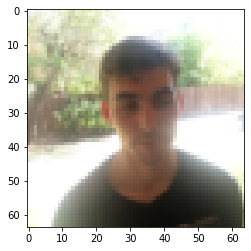

In [208]:
# Visualize an image from the training dataset
plt.imshow(X_train[7])
plt.show

Layer Names: ['conv0', 'max_pool0', 'conv1', 'max_pool1']
Activation/Output shape of layer conv0 : (1, 62, 62, 64)
Activation/Output shape of layer max_pool0 : (1, 31, 31, 64)
Activation/Output shape of layer conv1 : (1, 27, 27, 128)
Activation/Output shape of layer max_pool1 : (1, 13, 13, 128)


/home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


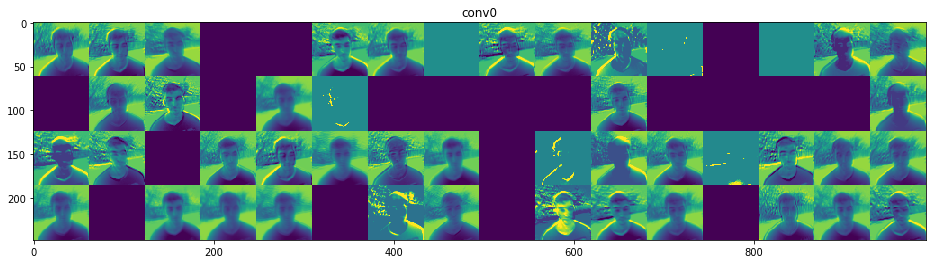

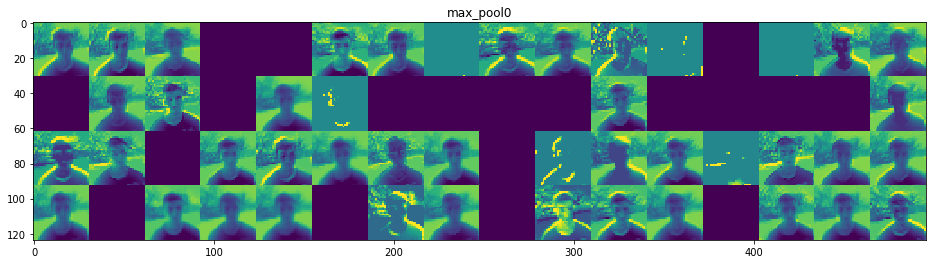

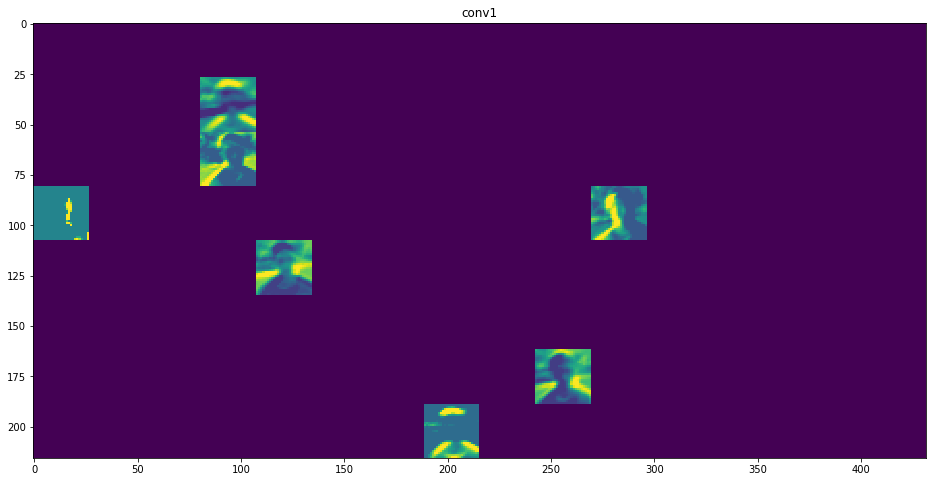

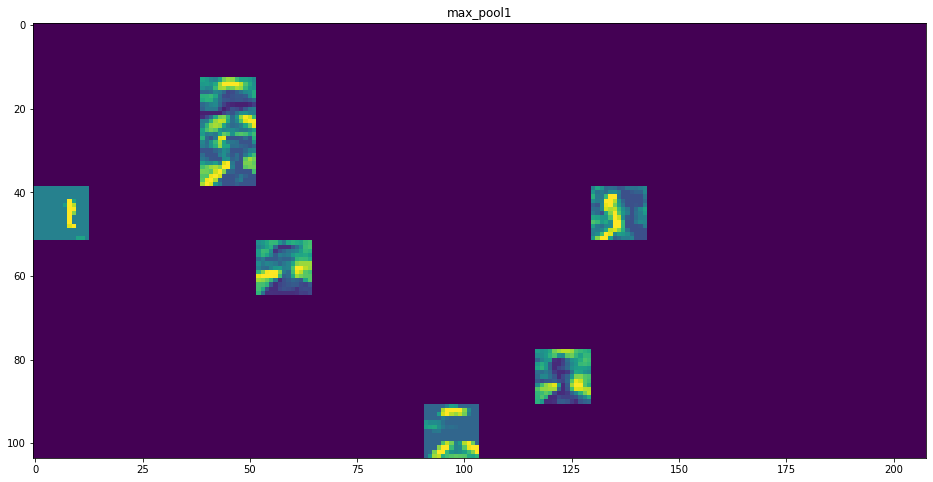

In [210]:
#Extract the output from all the layers of the model
layer_outputs = [layer.output for layer in model.layers] 

#Creates a model that will return activations/layer output, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs) 

# Predictions from intermediate layers on one of the training image
intermediate_activations = activation_model.predict(np.expand_dims(X_train[7], axis=0))
#print(intermediate_activations[2].shape)

layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)
print('Layer Names:', layer_names)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    
    n_shape = layer_activation.shape            # output/activation shape of each intermediate layer
    n_features = layer_activation.shape[-1]     # number of channels/filters or features in the layer
    print('Activation/Output shape of layer {} : {}'.format(layer_name, n_shape))
    
    
    size = layer_activation.shape[1]            # Width/height of the output image
    
    n_cols = n_features // images_per_row     
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range (images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
            
    scale = 1. /size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
